<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/desafio_churn_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###carregar dados


In [2]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [4]:
#fazendo uma copy do original
df_churn_train_copy = df_churn_train.copy()

In [5]:
df_churn_train_copy

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [6]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


 **'id':'id',     'gender':'genero',    'SeniorCitizen':'Idoso', 
 
  'Partner':'TemParceiro',      'Dependents':'TemDependentes',

  'tenure':'MesesNaCompanhia',     'PhoneService':'TemTelefone',

   'MultipleLines':'MaisLinhas',    'InternetService':'TemInternet',

    'OnlineSecurity':'ServicoSegurancaOnline',   

    'OnlineBackup':'ServicoBackupOnline',

    'DeviceProtection':'ServicoProtecaoOnline',

    'TechSupport':'ServicoSuporteOnline',

    'StreamingTV':'ServicoTV',

    'StreamingMovies':'ServicoPctFilmes',

    'Contract':'Contrato',

    'PaperlessBilling':'ContaOnline',

    'PaymentMethod':'MetodoPagamento',

    'MonthlyCharges':'CobrancaMensal',

    'TotalCharges':'CobrancaTotal',

    'Churn':'Churn'**


In [7]:
#contar a variavel target
df_churn_train['churn'].value_counts()

0    4139
1    1495
Name: churn, dtype: int64

In [8]:
df_churn_train['churn'].shape

(5634,)

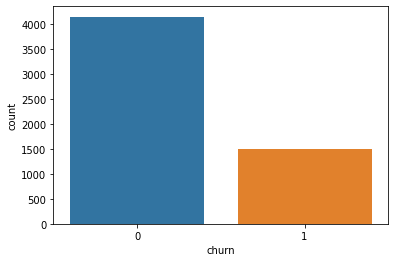

In [9]:
sns.countplot( x ='churn', data = df_churn_train)

In [10]:
#percentagem de 0 e 1 da variavel target
df_churn_train['churn'].value_counts()/df_churn_train.shape[0]*100

0    73.464679
1    26.535321
Name: churn, dtype: float64

In [11]:
#(linhas, colunas) do df
df_churn_train.shape


(5634, 21)

### Missing Values

In [12]:
df_churn_train.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

In [16]:
#identificando os tipos de variaveis missing
df_churn_train[['dependents','tenure','paymentmethod']].dtypes

dependents        object
tenure           float64
paymentmethod     object
dtype: object

###Analise da tenure

Text(0.5, 1.0, 'box tenure')

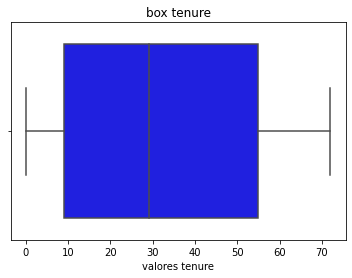

In [17]:
#plota usando o Seaborn, somente tenure é float

plt.subplot(1,1, 1)
fig = sns.boxplot(x = 'tenure', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores tenure')
fig.set_title('box tenure')



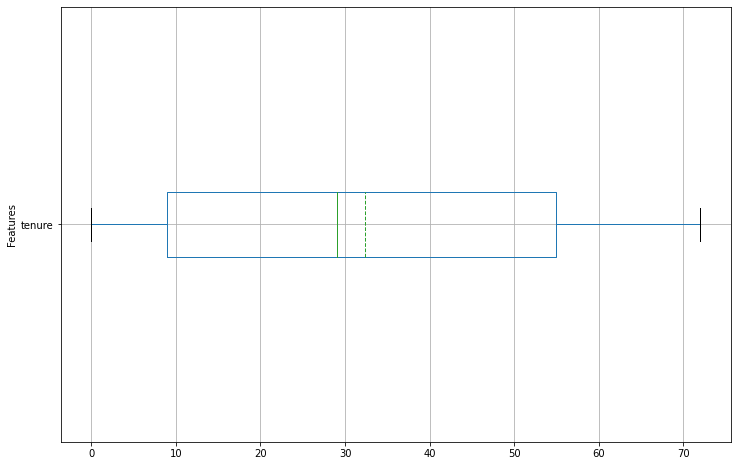

In [18]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [21]:
#
df_churn_train[['tenure']]

,tenure
0,56.0
1,NaN
2,60.0
3,37.0
4,29.0
...,...
5629,43.0
5630,NaN
5631,28.0
5632,63.0


In [22]:
#isna para serie e df
#no df é mais detalhada
df_churn_train[['tenure']].isna().sum()

tenure    461
dtype: int64

In [23]:
#isna para serie e df
df_churn_train['tenure'].isna().sum()

461

In [24]:
#os isna na tenure 8,18%, substiuir pela mean()
df_churn_train['tenure'].isna().sum()/df_churn_train.shape[0]*100

8.182463613773518

In [25]:
df_churn_train['tenure'].mean()

32.332882273342356

In [26]:
df_churn_train[['tenure']].describe()

,tenure
count,5173.000000
mean,32.332882
std,24.463607
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [27]:
#29(53); 9 (81); 55(48), substutir por 27
mp_q = (9*81+29*53+55*48)/(53+81+48)
mp_q
                    

26.956043956043956

In [28]:
df_churn_train[df_churn_train['tenure']==55].count()

id                  48
gender              48
seniorcitizen       48
partner             48
dependents          46
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [29]:
#substituição dos na por mp_q = 27
df_churn_train['tenure'].fillna(27, inplace = True)

In [30]:
df_churn_train[df_churn_train['tenure'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [31]:
#checa o describe apos o trata na
df_churn_train[['tenure']].describe()

,tenure
count,5634.000000
mean,31.896521
std,23.486740
min,0.000000
25%,10.000000
50%,27.000000
75%,53.000000
max,72.000000


**tratar os dependentes**

In [32]:
df_churn_train[['dependents']]

,dependents
0,No
1,Yes
2,No
3,No
4,Yes
...,...
5629,No
5630,No
5631,No
5632,Yes


In [33]:
#conta os No e Yes
df_churn_train[['dependents']].value_counts()

dependents
No            3793
Yes           1623
dtype: int64

In [34]:
dependents_na = df_churn_train['dependents'].isna().sum()
dependents_na

218

In [35]:
#calcula a % excluindo os na
df_churn_train[['dependents']].value_counts()/(df_churn_train.shape[0]-dependents_na)*100

dependents
No            70.033235
Yes           29.966765
dtype: float64

In [36]:
dependents_na/df_churn_train.shape[0]*100

3.8693645722399714

In [37]:
na_70_no = dependents_na*0.7
na_70_no

152.6

In [38]:
na_30_yes = dependents_na*0.3
na_30_yes

65.39999999999999

In [39]:
#fazendo uam copia do df, feature 'dependents para tratar
df_dependents_trat_na = df_churn_train[['dependents']].copy()
df_dependents_trat_na

,dependents
0,No
1,Yes
2,No
3,No
4,Yes
...,...
5629,No
5630,No
5631,No
5632,Yes


In [41]:
df_dependents_trat_na1 = df_dependents_trat_na[df_dependents_trat_na['dependents'].isna()]
df_dependents_trat_na1

,dependents
73,NaN
89,NaN
110,NaN
156,NaN
179,NaN
...,...
5512,NaN
5522,NaN
5541,NaN
5558,NaN


In [42]:
df_dependents_trat_na1['dependents'][73]

nan

###testando o prenchimento do NaN na coluna dependents

In [43]:
#criar uma lista dos index nan na feature dependents
l_index_na_dep = list(df_dependents_trat_na1[df_dependents_trat_na1['dependents'].isna()].index)
l_index_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [44]:
len(l_index_na_dep)

218

In [45]:
#tratamento da feature dependents
s = 0
for c in l_index_na_dep:
    s = s + 1  
    if s < 65:
        df_dependents_trat_na1['dependents'][c] = 'Yes'
    else:
        df_dependents_trat_na1['dependents'][c] = 'No'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
df_dependents_trat_na1.isna().sum()

dependents    0
dtype: int64

In [47]:
df_dependents_trat_na1[['dependents']].value_counts()/df_dependents_trat_na1.shape[0]

dependents
No            0.706422
Yes           0.293578
dtype: float64

In [ ]:
#df_churn_train['tenure'].fillna(mp_q, inplace = True)
#df_churn_train['dependents'].replace(df_dependents_trat_na1['dependents'], inplace = True)

In [48]:
#df_churn_train
l_index_churn_na_dep = list(df_churn_train[df_churn_train['dependents'].isna()].index)
l_index_churn_na_dep

[73,
 89,
 110,
 156,
 179,
 222,
 287,
 293,
 301,
 324,
 335,
 337,
 394,
 492,
 496,
 522,
 545,
 546,
 574,
 636,
 698,
 726,
 807,
 815,
 835,
 845,
 879,
 898,
 901,
 978,
 980,
 991,
 1000,
 1017,
 1047,
 1056,
 1061,
 1063,
 1096,
 1104,
 1183,
 1188,
 1208,
 1222,
 1315,
 1318,
 1367,
 1393,
 1427,
 1446,
 1461,
 1473,
 1483,
 1507,
 1512,
 1545,
 1572,
 1576,
 1578,
 1618,
 1649,
 1670,
 1694,
 1755,
 1757,
 1769,
 1801,
 1851,
 1864,
 1990,
 1997,
 1998,
 2019,
 2028,
 2046,
 2057,
 2095,
 2097,
 2098,
 2102,
 2116,
 2123,
 2128,
 2156,
 2169,
 2197,
 2213,
 2268,
 2311,
 2316,
 2335,
 2339,
 2386,
 2394,
 2446,
 2448,
 2458,
 2462,
 2484,
 2487,
 2503,
 2507,
 2510,
 2553,
 2575,
 2620,
 2648,
 2687,
 2694,
 2727,
 2733,
 2734,
 2736,
 2752,
 2754,
 2758,
 2763,
 2785,
 2832,
 2833,
 2839,
 2840,
 2889,
 2920,
 2933,
 2964,
 3056,
 3115,
 3127,
 3144,
 3164,
 3166,
 3184,
 3199,
 3252,
 3266,
 3284,
 3286,
 3288,
 3414,
 3419,
 3440,
 3458,
 3526,
 3556,
 3584,
 3587,
 3600

In [49]:
len(l_index_churn_na_dep)

218

In [50]:
#tratamento da feature dependents no df_churn_train
s = 0
for c in l_index_churn_na_dep:
    s = s + 1  
    if s < 65:
        df_churn_train['dependents'][c] = 'Yes'
    else:
        df_churn_train['dependents'][c] = 'No'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

In [53]:
df_churn_train[df_churn_train['dependents'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


###tratamento da paymentmethod

In [54]:
#conta a feature
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
dtype: int64

In [55]:
#conta os Nan na feature
df_churn_train['paymentmethod'].isna().sum()

99

In [56]:
df_churn_train['paymentmethod'].shape[0]

5634

In [ ]:
#calcula as % para cada forma de pay, excluindo os missing
df_churn_train[['paymentmethod']].value_counts()/(df_churn_train['paymentmethod'].shape[0]-99)*100

paymentmethod            
Electronic check             34.092141
Mailed check                 22.981030
Bank transfer (automatic)    21.897019
Credit card (automatic)      21.029810
dtype: float64

In [57]:
#% de quanto os missing estão em pay
99/5634*100

1.7571884984025559

In [58]:
#elect = 32 (16 - M e 16 - f)
99*0.34

33.660000000000004

In [59]:
#mail = 22(11- M 11 - f)
99*0.2298

22.7502

In [60]:
#bank = 22
99*0.2189

21.671100000000003

In [61]:
#cc = 23(12H 11M)
99*0.21


20.79

In [65]:
#df na feature 'paymentmethod' que tem NaN
df_churn_train[df_churn_train['paymentmethod'].isna()]

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
59,5899,Female,0,Yes,Yes,33.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,NaN,24.15,800.3,0
196,5036,Male,0,No,No,20.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,NaN,78.80,1641.3,0
247,704,Female,0,No,No,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,NaN,20.55,33.6,0
337,5747,Female,0,No,Yes,10.0,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,NaN,81.00,818.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,5150,Female,0,No,No,62.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,NaN,19.20,1123.65,0
5398,6004,Female,0,Yes,No,71.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,NaN,93.20,6506.15,0
5470,2276,Male,0,Yes,Yes,1.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,NaN,74.50,74.5,1
5484,6869,Male,0,No,No,13.0,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,NaN,91.10,1135.7,1


In [66]:
#captura os index dos NaN numa lista
l_index_na_pay = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_na_pay

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [67]:
df_churn_train[['paymentmethod']].value_counts()

paymentmethod            
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
dtype: int64

In [ ]:
#paymentmethod com o gender
df_churn_train[['paymentmethod', 'gender']].value_counts()

paymentmethod              gender
Electronic check           Male      963
                           Female    924
Mailed check               Male      657
Bank transfer (automatic)  Female    637
Mailed check               Female    615
Credit card (automatic)    Male      605
Bank transfer (automatic)  Male      575
Credit card (automatic)    Female    559
dtype: int64

In [68]:
605/(605+559)

0.5197594501718213

In [70]:
#df de teste para tratar missing
df_pay_trat_na = df_churn_train[['paymentmethod', 'gender']].copy()
df_pay_trat_na


,paymentmethod,gender
0,NaN,Female
1,Mailed check,Male
2,Credit card (automatic),Female
3,Bank transfer (automatic),Female
4,Electronic check,Male
...,...,...
5629,Electronic check,Male
5630,Electronic check,Male
5631,Bank transfer (automatic),Female
5632,Mailed check,Male


In [71]:
l_index_pay = list(df_pay_trat_na[df_pay_trat_na['paymentmethod'].isna()].index)
l_index_pay

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [72]:
df_pay_trat_na[df_pay_trat_na['paymentmethod'].isna()]

,paymentmethod,gender
0,NaN,Female
59,NaN,Female
196,NaN,Male
247,NaN,Female
337,NaN,Female
...,...,...
5325,NaN,Female
5398,NaN,Female
5470,NaN,Male
5484,NaN,Male


In [73]:
df_pay_trat_na['gender'][1]

'Male'

In [74]:
df_pay_trat_na['paymentmethod'][1]

'Mailed check'

In [75]:
df_pay_trat_na['paymentmethod'][0]

nan

In [76]:
#lista isna df_churn_train
l_index_pay_c = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [77]:
#tratamento da feature dependents no df_pay_trat_na
b = 0
for c in l_index_pay:
    b = b + 1  
    if b < 32:
        if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'] = 'Electronic check'
        else:
            df_pay_trat_na['paymentmethod'] = 'Electronic check'
    if b < 54:
         if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'] = 'Mailed check'
         else:
            df_pay_trat_na['paymentmethod'] = 'Mailed check'
    if b < 77:
         if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'] = 'Credit card'
         else:
            df_pay_trat_na['paymentmethod'] = 'Credit card'
    if b < 99:
         if df_pay_trat_na['gender'][c] == 'Female':
            df_pay_trat_na['paymentmethod'] = 'Banck transfer'
         else:
            df_pay_trat_na['paymentmethod'] = 'Banck transfer'


   

In [79]:
#resultado do preenchimento
df_pay_trat_na.isna().sum()

paymentmethod    0
gender           0
dtype: int64

In [80]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

In [81]:
df_pay_trat_na['paymentmethod'][0]

'Banck transfer'

In [82]:
df_pay_trat_na[df_pay_trat_na['paymentmethod'].isna()]

,paymentmethod,gender


In [83]:
df_churn_train.isna().sum()

id                   0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod       99
monthlycharges       0
totalcharges         0
churn                0
dtype: int64

In [84]:
#lista isna df_churn_train
l_index_pay_c = list(df_churn_train[df_churn_train['paymentmethod'].isna()].index)
l_index_pay_c

[0,
 59,
 196,
 247,
 337,
 358,
 390,
 445,
 486,
 493,
 529,
 632,
 658,
 688,
 689,
 827,
 1023,
 1115,
 1122,
 1133,
 1160,
 1179,
 1185,
 1253,
 1336,
 1343,
 1429,
 1517,
 1545,
 1598,
 1604,
 1712,
 1728,
 1733,
 1833,
 1850,
 1858,
 1863,
 1954,
 2023,
 2091,
 2140,
 2160,
 2220,
 2285,
 2321,
 2392,
 2395,
 2473,
 2525,
 2681,
 2704,
 2904,
 2983,
 3001,
 3074,
 3084,
 3099,
 3108,
 3139,
 3193,
 3218,
 3236,
 3386,
 3494,
 3569,
 3585,
 3642,
 3761,
 3801,
 3880,
 3922,
 4003,
 4006,
 4066,
 4106,
 4131,
 4138,
 4238,
 4539,
 4543,
 4575,
 4600,
 4666,
 4813,
 4856,
 4898,
 4954,
 5029,
 5044,
 5049,
 5172,
 5278,
 5317,
 5325,
 5398,
 5470,
 5484,
 5542]

In [85]:
#tratamento da feature dependents no df_churn_train
b = 0
for c in l_index_pay_c:
    b = b + 1  
    if b < 32:
        if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'] = 'Electronic check'
        else:
            df_churn_train['paymentmethod'] = 'Electronic check'
    if b < 54:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'] = 'Mailed check'
         else:
            df_churn_train['paymentmethod'] = 'Mailed check'
    if b < 77:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'] = 'Credit card'
         else:
            df_churn_train['paymentmethod'] = 'Credit card'
    if b < 99:
         if df_churn_train['gender'][c] == 'Female':
            df_churn_train['paymentmethod'] = 'Banck transfer'
         else:
            df_churn_train['paymentmethod'] = 'Banck transfer'




In [86]:
df_churn_train.isna().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [101]:
df_churn_train

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Banck transfer,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Banck transfer,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Banck transfer,110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Banck transfer,101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Banck transfer,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Banck transfer,44.15,1931.3,0
5630,604,Male,0,No,No,27.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Banck transfer,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Banck transfer,54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Banck transfer,25.25,1573.05,0


In [96]:
df_churn_train.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [102]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace('.',',')

In [105]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',','.')

In [106]:
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Banck transfer,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,27.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Banck transfer,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Banck transfer,110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Banck transfer,101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Banck transfer,70.75,1974.8,1


In [107]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].astype(float)


ValueError: ignored

Text(0.5, 1.0, 'box monthlycharges')

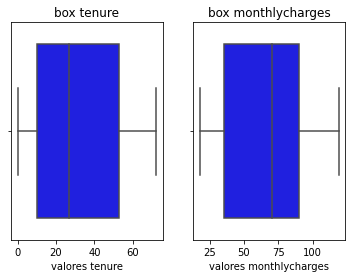

In [92]:
#plota usando o Seaborn, somente tenure é float

plt.subplot(1,2, 1)
fig = sns.boxplot(x = 'tenure', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores tenure')
fig.set_title('box tenure')

plt.subplot(1,2,2)
fig = sns.boxplot(x = 'monthlycharges', data = df_churn_train, orient= 'h', color = 'b')
fig.set_xlabel('valores monthlycharges')
fig.set_title('box monthlycharges')

#plt.subplot(1,3,3)
#fig = sns.boxplot(x = 'totalcharges', data = df_churn_train, orient= 'h', color = 'b')
#fig.set_xlabel('valores totalcharges')
#fig.set_title('box totalcharges')



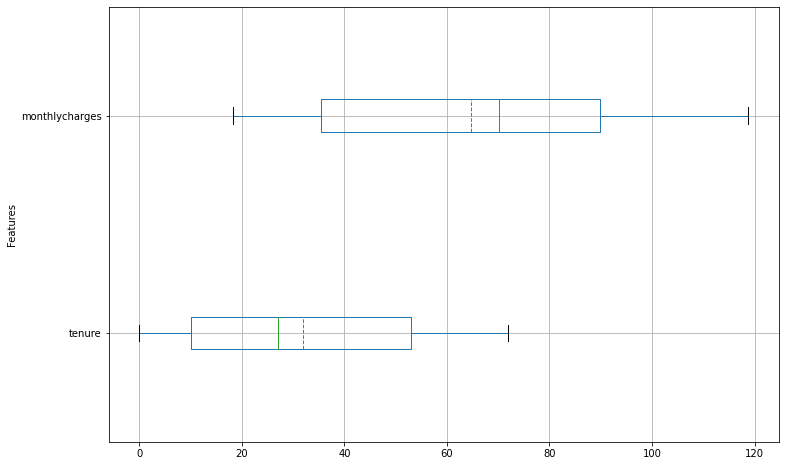

In [93]:
df_churn_train[['tenure','monthlycharges','totalcharges']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')